In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [5]:
# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


<ipython-input-6-78c106c5d968>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=customers, palette="viridis")


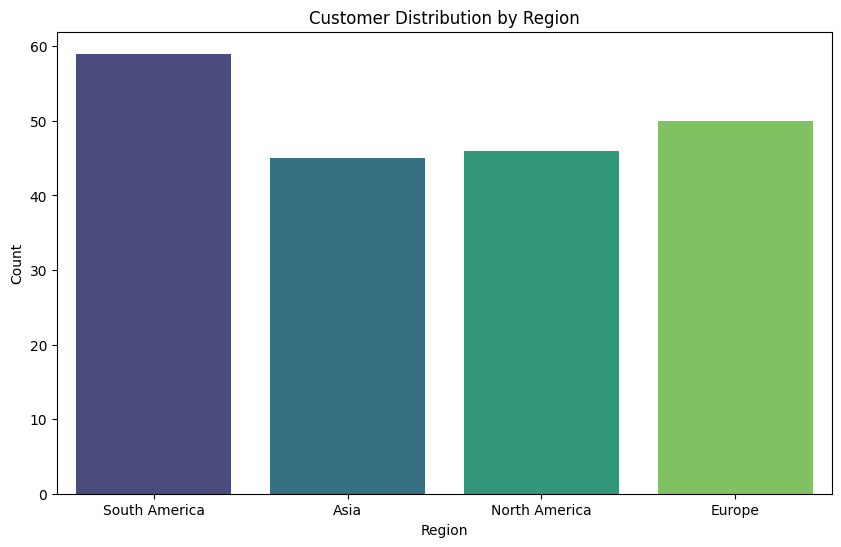

In [6]:
# Customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(x="Region", data=customers, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

<ipython-input-7-d2a0760f752f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=products, palette="muted")


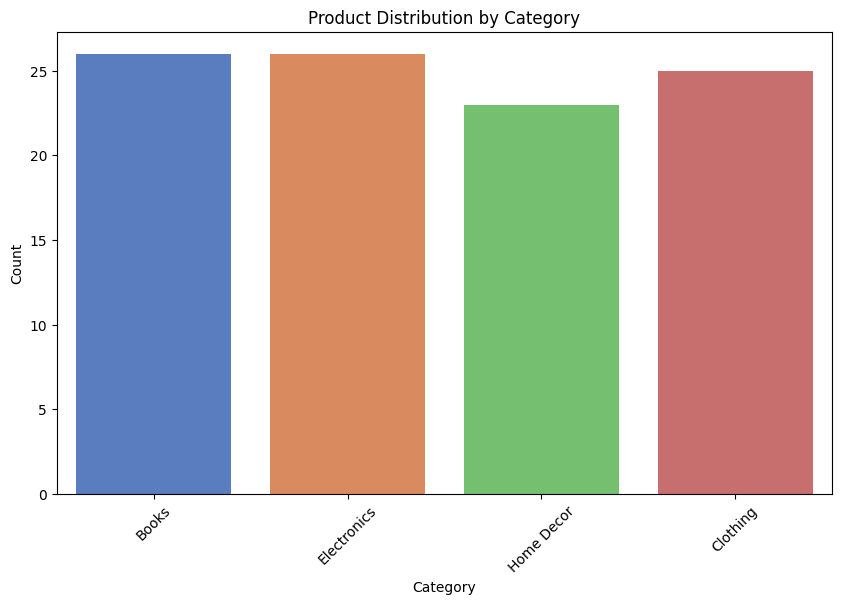

In [7]:
# Product distribution by category
plt.figure(figsize=(10, 6))
sns.countplot(x="Category", data=products, palette="muted")
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


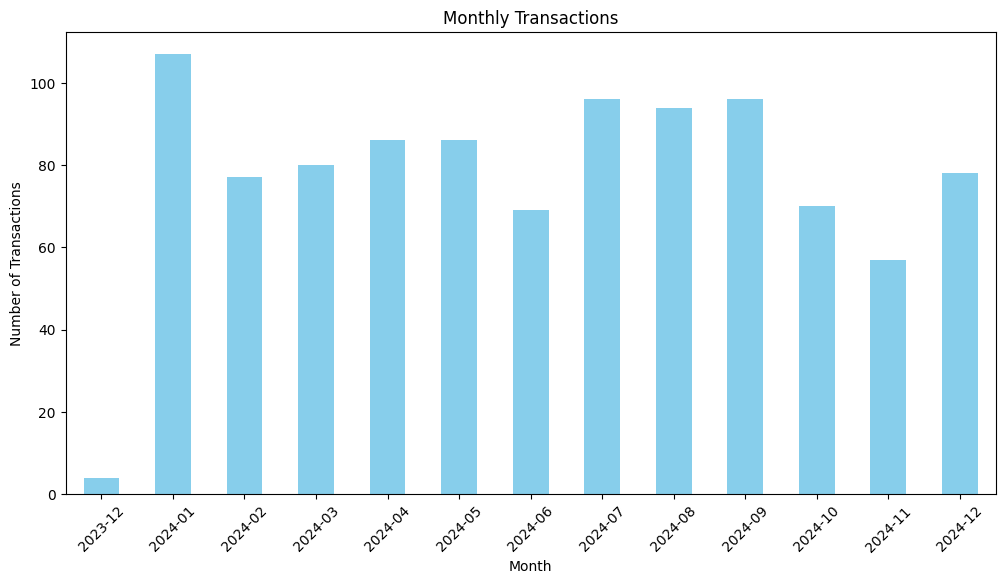

In [8]:
# Monthly transactions trend
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
transactions["Month"] = transactions["TransactionDate"].dt.to_period("M")
monthly_transactions = transactions.groupby("Month").size()

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind="bar", color="skyblue")
plt.title("Monthly Transactions")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


# **Customer Behavior Analysis**

In [9]:
# Customer Lifetime Value (LTV)
customer_lifetime_value = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_lifetime_value = customer_lifetime_value.sort_values(by='TotalValue', ascending=False)
print("Top 10 Customers by Lifetime Value:")
print(customer_lifetime_value.head(10))

Top 10 Customers by Lifetime Value:
    CustomerID  TotalValue
140      C0141    10673.87
53       C0054     8040.39
64       C0065     7663.70
155      C0156     7634.45
81       C0082     7572.91
186      C0188     7111.32
58       C0059     7073.28
27       C0028     6819.57
98       C0099     6715.72
164      C0165     6708.10


In [10]:
# Frequency of Transactions per Customer
transaction_frequency = transactions.groupby('CustomerID').size().reset_index(name='TransactionCount')
print("\nTop 10 Customers by Transaction Frequency:")
print(transaction_frequency.sort_values(by='TransactionCount', ascending=False).head(10))


Top 10 Customers by Transaction Frequency:
    CustomerID  TransactionCount
155      C0156                11
108      C0109                11
174      C0175                10
140      C0141                10
64       C0065                10
7        C0008                10
83       C0084                 9
74       C0075                 9
164      C0165                 9
146      C0147                 9


In [11]:
# Region-wise Spending
region_spending = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()
print("\nTotal Spending by Region:")
print(region_spending)



Total Spending by Region:
          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


<ipython-input-12-3a79d4669ac4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_spending, palette='coolwarm')


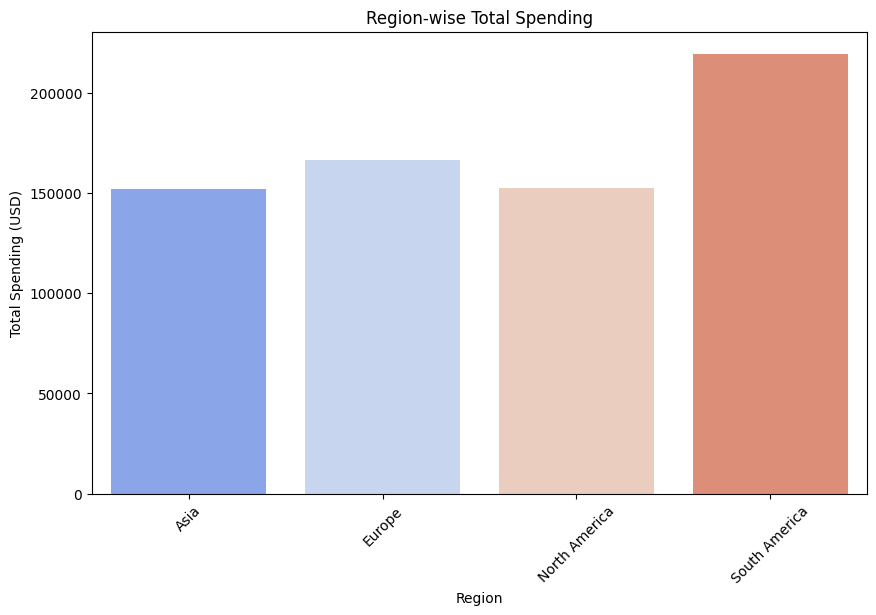

In [12]:
# Visualization of Region-wise Spending
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=region_spending, palette='coolwarm')
plt.title('Region-wise Total Spending')
plt.xlabel('Region')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()


# Product Performance Analysis

In [13]:
# Top and Bottom Products by Quantity Sold
product_performance = transactions.groupby('ProductID').agg(
    total_quantity=('Quantity', 'sum'),
    total_revenue=('TotalValue', 'sum')
).reset_index()

In [14]:
# Merge with Product Names
product_performance = product_performance.merge(products, on='ProductID')
print("\nTop 10 Products by Quantity Sold:")
print(product_performance.sort_values(by='total_quantity', ascending=False).head(10))

print("\nBottom 10 Products by Quantity Sold:")
print(product_performance.sort_values(by='total_quantity', ascending=True).head(10))


Top 10 Products by Quantity Sold:
   ProductID  total_quantity  total_revenue            ProductName  \
58      P059              46       13947.20        SoundWave Jeans   
53      P054              46        2635.80     SoundWave Cookbook   
28      P029              45       19513.80     TechPro Headphones   
78      P079              43       17946.91         ActiveWear Rug   
60      P061              43        6749.28    HomeSense Desk Lamp   
56      P057              43       10307.10  ActiveWear Smartphone   
47      P048              43       17905.20       TechPro Cookbook   
61      P062              39       14592.24        HomeSense Novel   
19      P020              38       15060.92      ActiveWear Jacket   
27      P028              38        8952.04    HomeSense Desk Lamp   

       Category   Price  
58     Clothing  303.20  
53        Books   57.30  
28  Electronics  433.64  
78   Home Decor  417.37  
60   Home Decor  156.96  
56  Electronics  239.70  
47        Bo

<ipython-input-15-a1604c54e598>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='total_revenue', data=category_performance, palette='viridis')


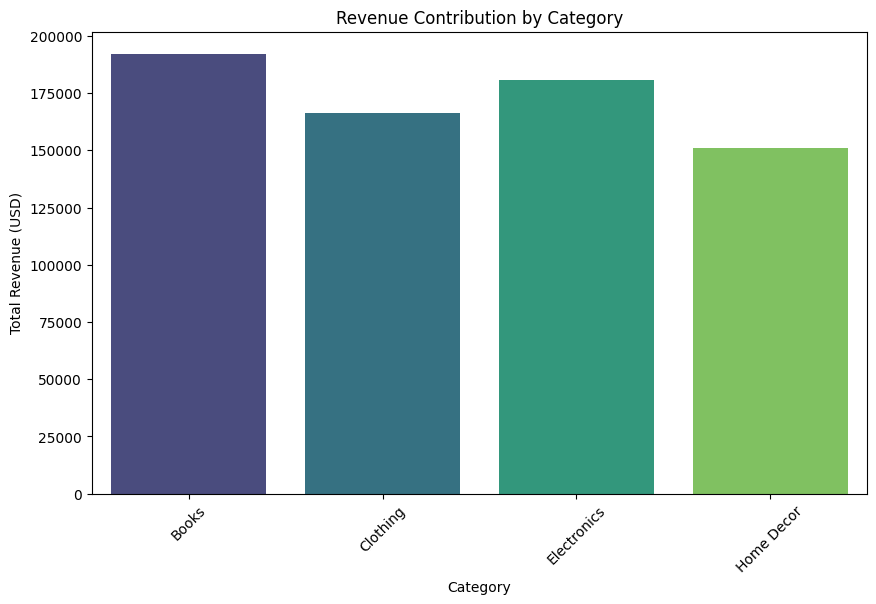

In [15]:
# Visualization of Top Categories
category_performance = product_performance.groupby('Category')['total_revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='total_revenue', data=category_performance, palette='viridis')
plt.title('Revenue Contribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# Time-Based Trends

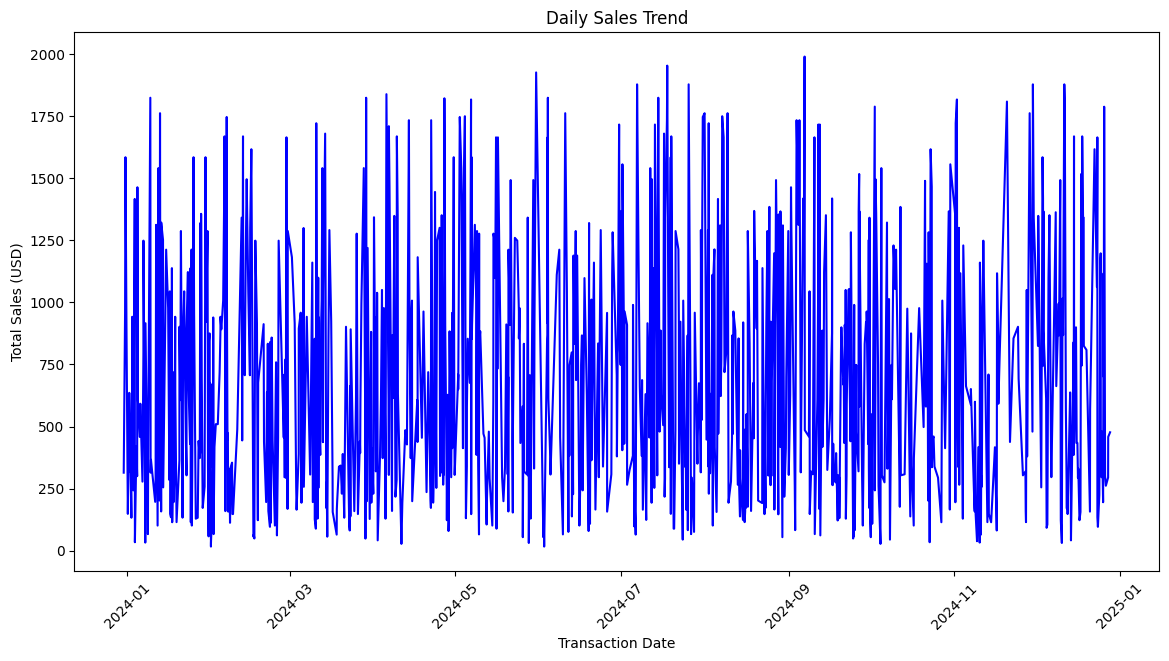

In [16]:
# Daily Sales Trend
daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum().reset_index()
daily_sales['TransactionDate'] = pd.to_datetime(daily_sales['TransactionDate'])

plt.figure(figsize=(14, 7))
sns.lineplot(x='TransactionDate', y='TotalValue', data=daily_sales, color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


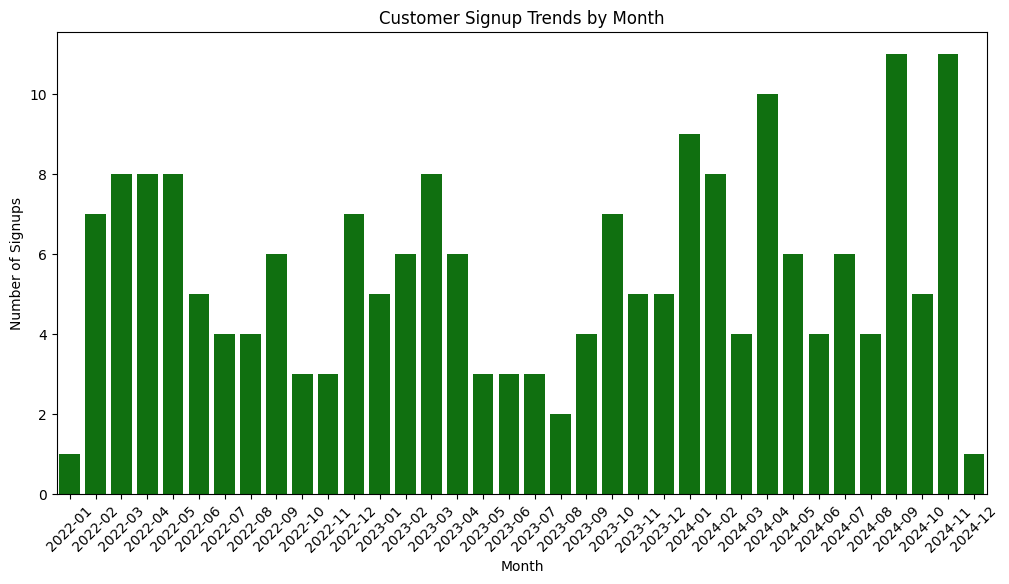

In [17]:
# Monthly Signup Trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonth').size().reset_index(name='CustomerCount')

plt.figure(figsize=(12, 6))
sns.barplot(x='SignupMonth', y='CustomerCount', data=signup_trends, color='green')
plt.title('Customer Signup Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

# Correlations and Relationships


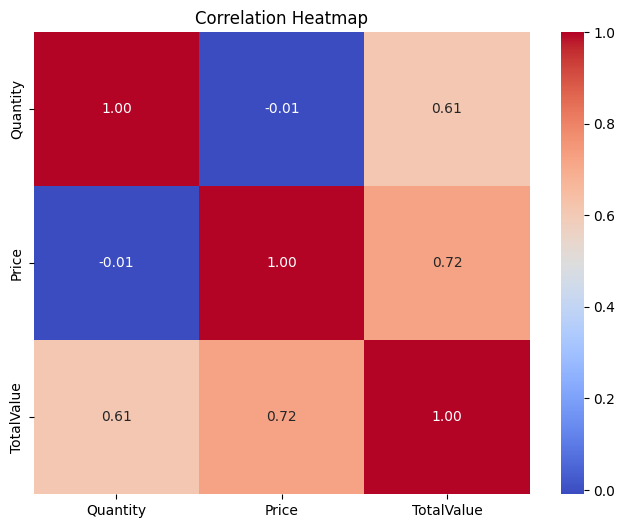

In [18]:
# Correlation Heatmap
correlation_matrix = transactions[['Quantity', 'Price', 'TotalValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


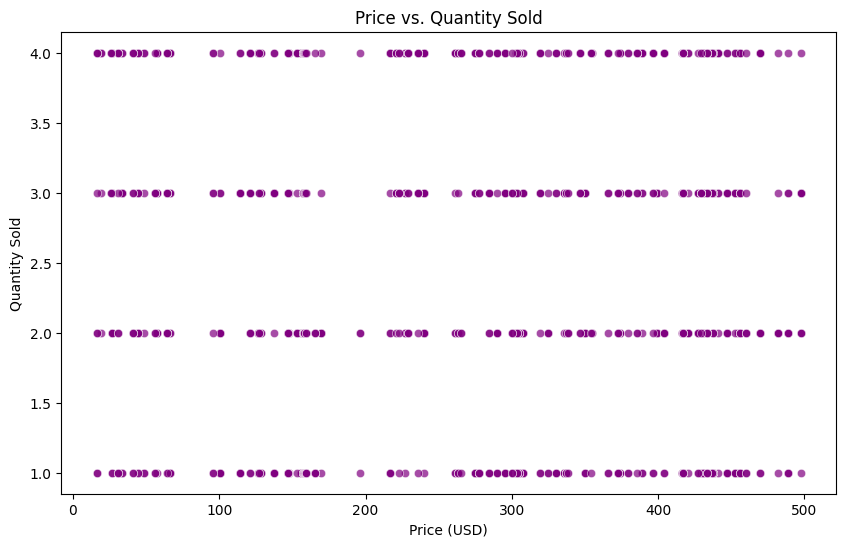

In [19]:
# Price vs. Quantity Sold Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity', data=transactions, alpha=0.7, color='purple')
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()

# Outlier Detection

In [20]:
# Detect Customers with High Lifetime Value
high_value_customers = customer_lifetime_value[customer_lifetime_value['TotalValue'] > customer_lifetime_value['TotalValue'].quantile(0.95)]
print("High-Value Customers (Top 5%):")
print(high_value_customers)


High-Value Customers (Top 5%):
    CustomerID  TotalValue
140      C0141    10673.87
53       C0054     8040.39
64       C0065     7663.70
155      C0156     7634.45
81       C0082     7572.91
186      C0188     7111.32
58       C0059     7073.28
27       C0028     6819.57
98       C0099     6715.72
164      C0165     6708.10


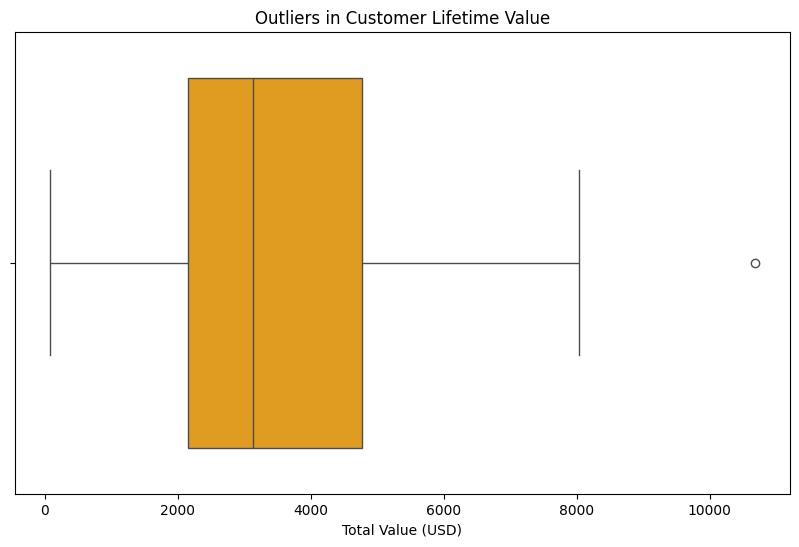

In [21]:
# Visualize Outliers in Total Value
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalValue', data=customer_lifetime_value, color='orange')
plt.title('Outliers in Customer Lifetime Value')
plt.xlabel('Total Value (USD)')
plt.show()

# Customer Engagement

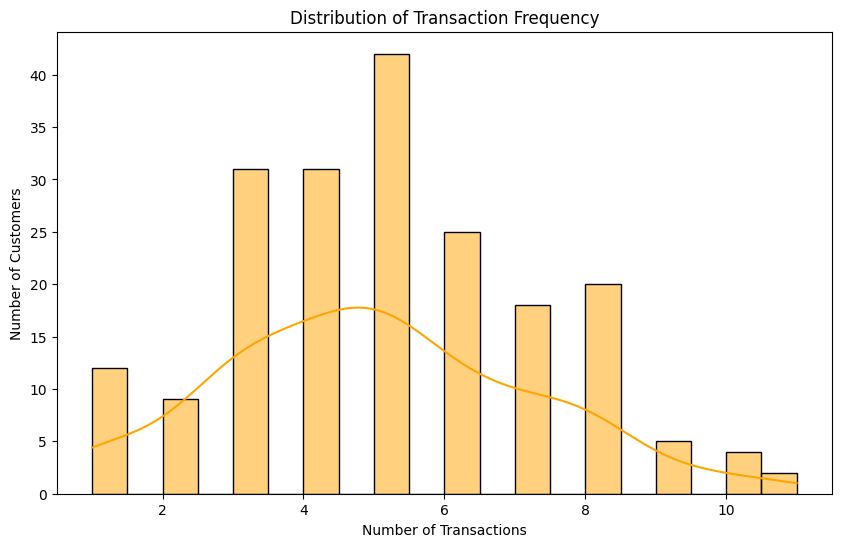

Low-frequency customers (<3 purchases): 21


In [23]:
# Transaction frequency
transaction_frequency = transactions.groupby('CustomerID').size().reset_index(name='TransactionCount')
low_freq_customers = transaction_frequency[transaction_frequency['TransactionCount'] < 3]

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(transaction_frequency['TransactionCount'], bins=20, kde=True, color='orange')
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

print(f"Low-frequency customers (<3 purchases): {len(low_freq_customers)}")
